## 製造數據科學作業二

#### 經濟四b09303047林奕霆

#### 第一題

(a)  
維度的詛咒是指在高維度的空間中，容易發生因數據在高維空間變得更遠，造成的樣本稀疏性問題，這會使得模型很難找到相同的資料來做分群；此外，維度的詛咒也可能是指高維度的資料需要較高的儲存空間及計算資源。  
例子: 在影像處理中，解析度越高的相片再進行辨識時，可能會有運算時間過長的問題，可能須進行降維來提升辨識效率。

(b)  
避免此現象的方法包括透過PCA、適當的特徵篩選來進行降維，將對預測結果不具顯著影響，或是具有共線性的因子行中刪除。

(C)

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt


In [88]:

# (1) 讀取數據並預處理
df = pd.read_csv('kc_house_data.csv')
df = df.drop(columns=['id','date'])
y = df['price']
X = df.drop(columns=['price'])
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [89]:
# (2) 進行線性迴歸
def linear_regression_summary(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

model = linear_regression_summary(X, y)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:28:53   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282

In [90]:
# (3) 逐步增加變數，計算adjusted R2
def calculate_adjusted_r2(X, y, included_columns):
    X = sm.add_constant(X[included_columns])
    model = sm.OLS(y, X).fit()
    return model.rsquared_adj

num_features = len(X.columns)
adjusted_r2_values = []

for i in range(1, num_features + 1):
    included_columns = X.columns[:i]
    adjusted_r2 = calculate_adjusted_r2(X, y, included_columns)
    adjusted_r2_values.append(adjusted_r2)

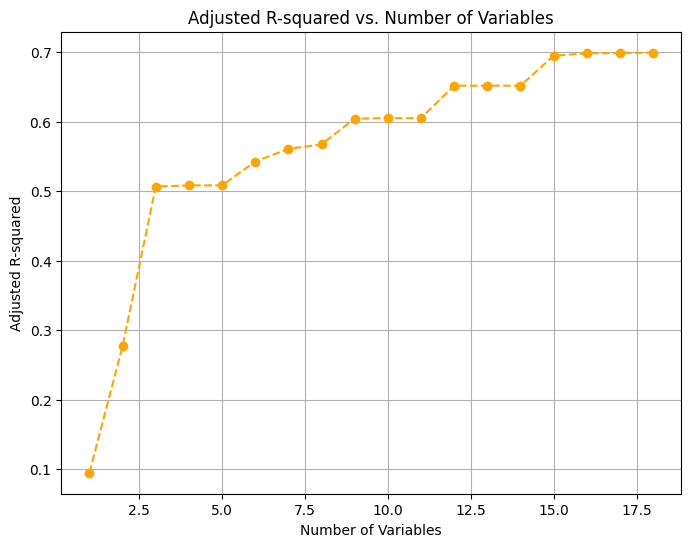

In [91]:
# (4) 繪製圖表
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_features + 1), adjusted_r2_values, marker='o', linestyle='--', color = 'orange')
plt.xlabel('Number of Variables')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared vs. Number of Variables')
plt.grid()
plt.show()

(d)  
透過維度的增加，adjusted R2並未因此下降，但是維度到了15後精準度卻出現持平的現象，推測可能原因是我的數據集的樣本數夠大(共21613筆)，且變數多和房屋價格有高度相關性。

#### 第二題

(a) 損失函數與模型評估指標之間的區別：
損失函數通常是一個在模型訓練過程中使用之可微分的函數，讓模型可以透過梯度下降等方法來學習，而模型評估指標通常在模型訓練之後才使用且不可微分的純量。

模型評估指標（Model Evaluation Metric）：

用於評估模型性能的指標，通常在模型訓練之後使用。
用於了解模型的效能如何，以及模型是否達到了特定的性能標準。
通常不是可微分的，而是一個直接的性能度量。
是最終用戶關心的指標，如精確度、召回率、F1分數、ROC曲線下面積等。


(b) 

Mean Squared Error，MSE：  
適用於迴歸問題，例如房價預測。  
優點：
考慮預測值和實際值之間的差異的平方，強調大誤差。  
缺點：
對異常值敏感，因為它們的平方誤差會放大。
可能不適用於分類問題。  

Cross-Entropy Loss：  
用於分類問題，如圖像分類或文本分類。      
優點：
促使模型產生概率分佈，使預測接近實際標籤。  
缺點：
可能過於敏感，導致過擬合，特別是在樣本不平衡的情況下。

(c) 
MAE vs. MSE  
MAE=預測值與實際質差的絕對值的均值  
MSE=預測值與實際質差的平方差的均值  
如果問題中有很多異常值，可能更適合使用MAE，因為它不會被異常值的平方誤差拉高。 如果異常值相對較少，MSE通常是合理的選擇，因為它會對其他樣本的差異施加更大的懲罰，從而更好的擬合數據。

#### 第三題

(a)

我會使用以下三種方法來確認數據的品質  
1.各特徵的缺失值比例  
2.各row的缺失值比例  
3.各features的分布

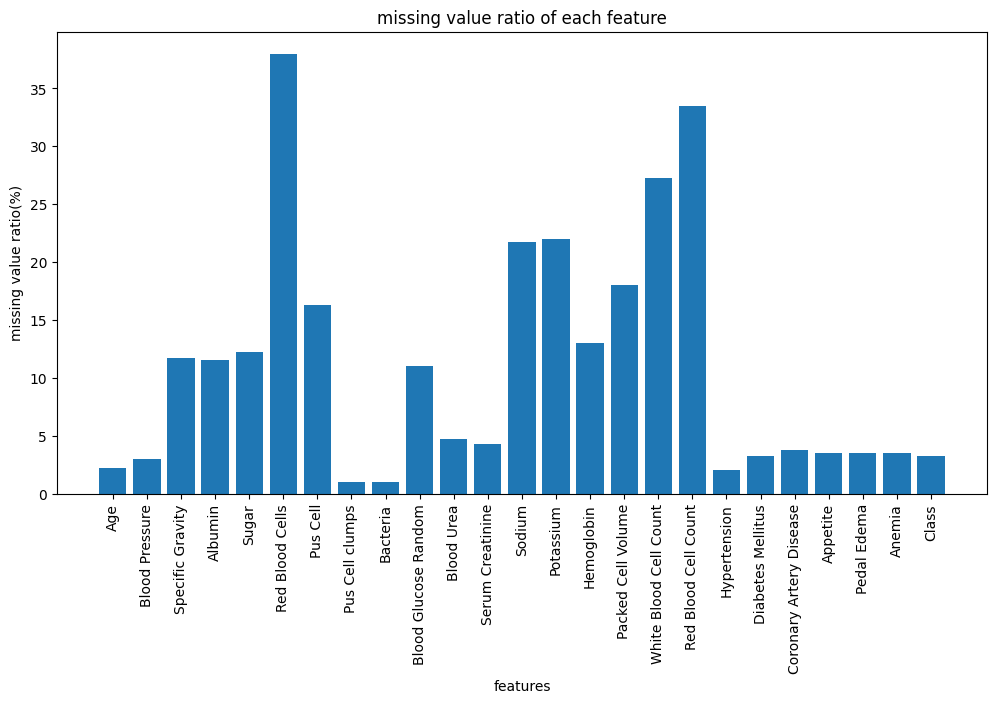

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀入 Excel 檔案
file_path = "MDS_Assignment2_kidney.xlsx"
data = pd.read_excel(file_path)

# 計算每個 column 的缺失值比例
missing_percentages = (data.isin(['?', np.nan, '', 'NA', 'N/A', 'null', 'None', 'nan'])).mean() * 100

# 繪製長條圖
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_percentages)), missing_percentages)
plt.xlabel("features")
plt.ylabel("missing value ratio(%)")
plt.title("missing value ratio of each feature")
plt.xticks(range(len(missing_percentages)), missing_percentages.index, rotation=90)
plt.show()

藉由特徵的缺失值比例來，可以發現此資料集每個特徵皆具有缺失值，以缺失值比例為0.2當作門檻可發現缺失比例高值有五個特徵。

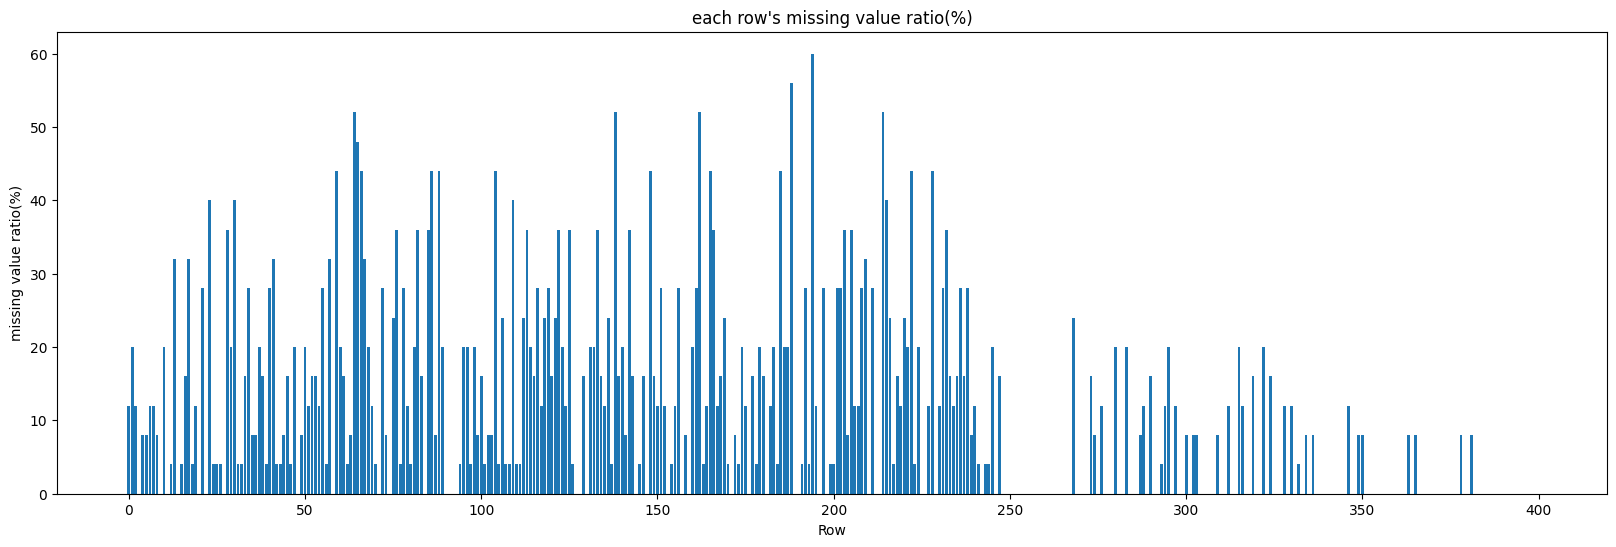

In [72]:
# 計算每個 row 的缺失值比例
missing_percentages = (data.isin(['?', np.nan, '', 'NA', 'N/A', 'null', 'None', 'nan'])).mean(axis=1) * 100

# 繪製長條圖
plt.figure(figsize=(20, 6))
plt.bar(range(len(missing_percentages)), missing_percentages)
plt.xlabel("Row")
plt.ylabel("missing value ratio(%)")
plt.title("each row's missing value ratio(%)")
plt.show()

In [60]:
description = missing_percentages.describe()
print(description)


count    400.000000
mean      11.010000
std       13.220319
min        0.000000
25%        0.000000
50%        4.000000
75%       20.000000
max       60.000000
dtype: float64


由以上圖表可以看到每個個案的平均缺失值比例為11%，缺失值中位數為4%。

資料轉換(dummy)

In [73]:

# 定義需要轉換的變數
# 定義需要轉換的變數
variables_to_convert = {
    "Red Blood Cells": {"normal": 0, "abnormal": 1, "?": "?"},
    "Pus Cell": {"normal": 0, "abnormal": 1, "?": "?"},
    "Pus Cell clumps": {"notpresent": 0, "present": 1, "?": "?"},
    "Bacteria": {"notpresent": 0, "present": 1, "?": "?"},
    "Hypertension": {"no": 0, "yes": 1, "?": "?"},
    "Diabetes Mellitus": {"no": 0, "yes": 1, "?": "?"},
    "Coronary Artery Disease": {"no": 0, "yes": 1, "?": "?"},
    "Pedal Edema": {"no": 0, "yes": 1, "?": "?"},
    "Anemia": {"no": 0, "yes": 1, "?": "?"},
    "Appetite": {"good": 1, "poor": 0, "?": "?"},
    "Class": {'ckd':1,'notckd':0, "?": "?"}
}

# 進行變數轉換
for variable, mapping in variables_to_convert.items():
    data[variable] = data[variable].replace(mapping)

data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,80,1.02,1,0,?,0,0,0,121,...,44,7800,5.2,1,1,0,1,0,0,1.0
1,7,50,1.02,4,0,?,0,0,0,?,...,38,6000,?,0,0,0,1,0,0,1.0
2,62,80,1.01,2,3,0,0,0,0,423,...,31,7500,?,0,1,0,0,0,1,1.0
3,48,70,1.005,4,0,0,1,1,0,117,...,32,6700,3.9,1,0,0,0,1,1,1.0
4,51,80,1.01,2,0,0,0,0,0,106,...,35,7300,4.6,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,0,0,0,0,140,...,47,6700,4.9,0,0,0,1,0,0,0.0
396,42,70,1.025,0,0,0,0,0,0,75,...,54,7800,6.2,0,0,0,1,0,0,0.0
397,12,80,1.02,0,0,0,0,0,0,100,...,49,6600,5.4,0,0,0,1,0,0,0.0
398,17,60,1.025,0,0,0,0,0,0,114,...,51,7200,5.9,0,0,0,1,0,0,0.0


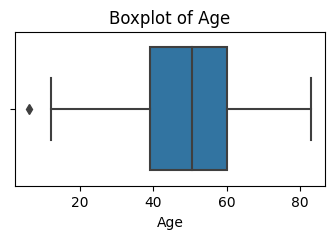

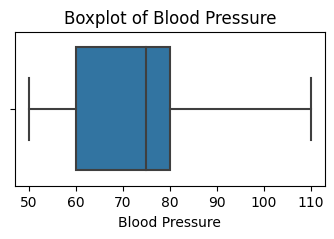

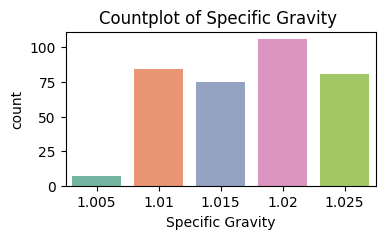

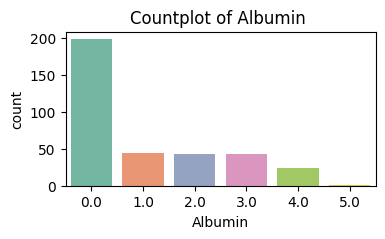

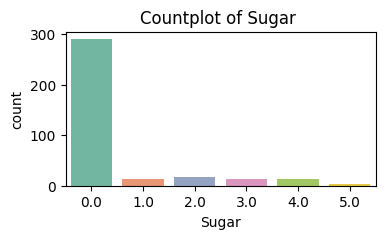

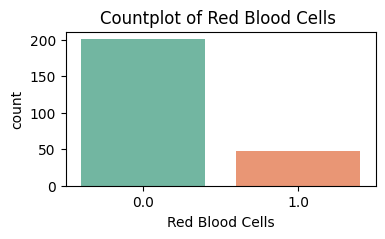

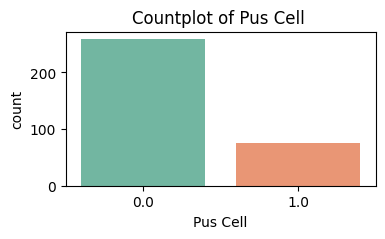

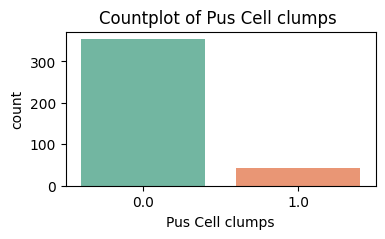

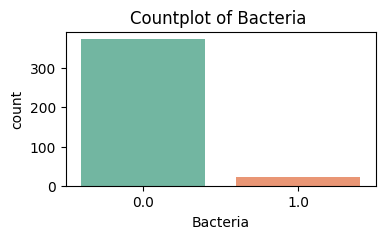

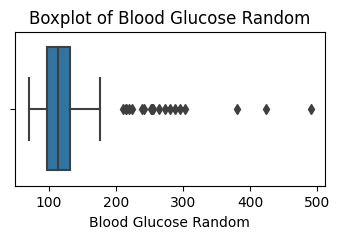

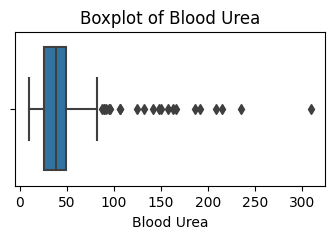

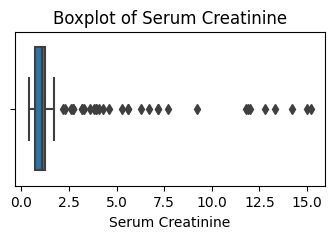

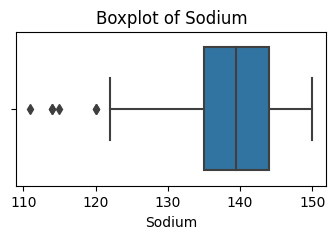

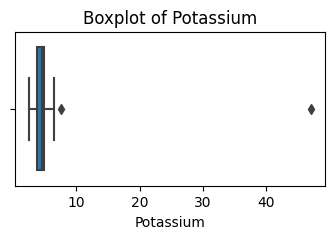

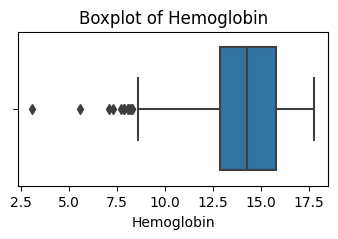

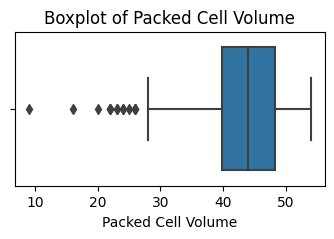

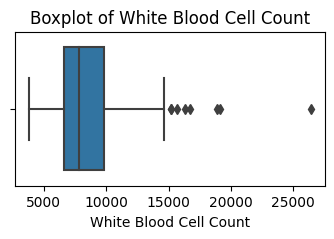

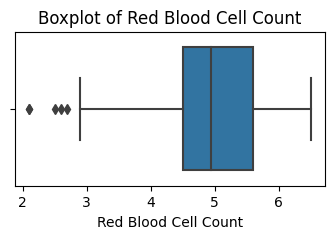

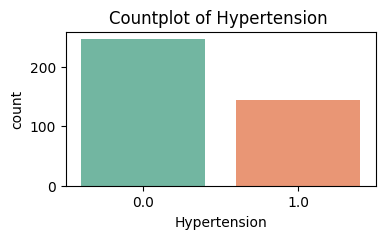

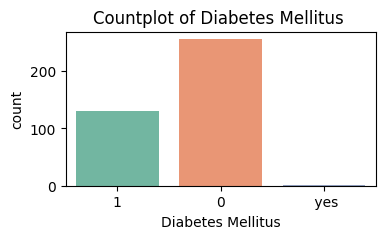

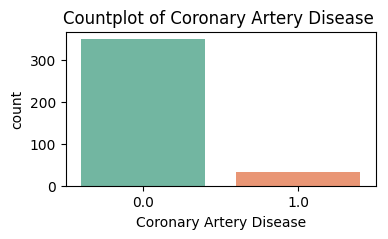

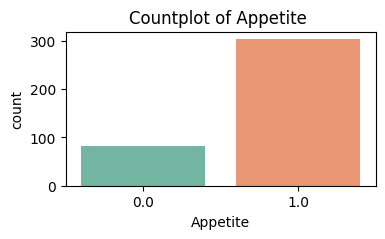

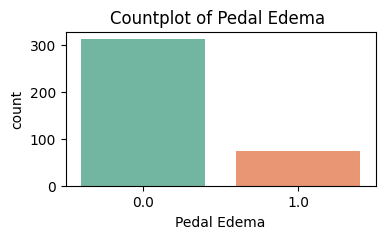

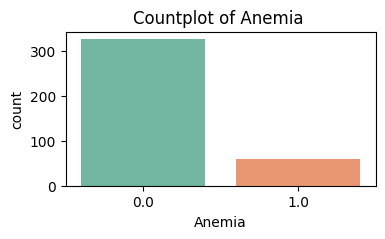

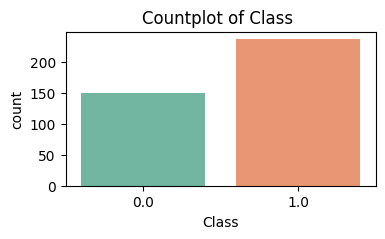

In [74]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 將 "?" 替換為 NaN
values_to_replace = ['?', 'N/A', 'NA', 'null', 'None', 'nan']

data.replace(values_to_replace, np.nan, inplace=True)

# 設定圖表的寬度和高度
fig_width = 4
fig_height = 2

# 獲取所有特徵名稱
features = data.columns

for feature in features:
    
    # 如果特徵包含個數小於10則輸出長條圖
    unique_values = data[feature].unique()
    if len(unique_values) < 10:
        # 創建新的圖
        plt.figure(figsize=(fig_width, fig_height))
        
        # 計算0和1的個數
        counts = data[feature].value_counts()
        
        # 繪製0和1的個數長條圖
        sns.countplot(x=feature, data=data, palette="Set2")
        
        # 設定標題
        plt.title(f"Countplot of {feature} ")
        
        # 顯示0和1的個數長條圖
        plt.show()
    else:
        plt.figure(figsize=(fig_width, fig_height))

        # 繪製箱型圖，排除 NaN 值
        sns.boxplot(x=feature, data=data.dropna())

        # 設定標題
        plt.title(f"Boxplot of {feature}")

        # 顯示箱型圖
        plt.show()


由各特徵的箱型及分布圖可以發現，Blood Glucose Random、Blood Urea、Serum Creatinine三者具有較多的離群值。


(b)  
我認為衡量數據品質的指標包括數據完整性、唯一性、合理性且可藉由以下三種量化方法衡量:  
1.完整性-缺失值比率：衡量資料完整性的重要指標，表示資料中缺失值的百分比。 公式：（缺失資料的數量 / 總資料的數量） * 100%。 較低的缺失值比率通常表示較好的資料品質。  
2.合理性-異常值比率：用於檢測資料中的異常值。 異常值是與其它數據點差異顯著的數據點。 公式：（異常資料點的數量 / 總資料的數量） * 100%。 較低的異常值比率表示更乾淨的數據。異常值可以是outlier。  
3.唯一性-重複值比率：如果一個資料及擁有過多重複欄位，那再多的資料可能也無法使機器學習模型能夠有效率進行學習。

(c)  
遺漏值處理的方法包括利用中位數、平均數、眾數等統計指標進行填充(如以下對該資料及處理的方法)，或者利用基於聚合類的方法如DBSCAN、K-Means，以及生成式模型等來進行遺漏值的估算和填補  
不處理遺漏值的可能原因如:某些模型如隨機森林、XGBoost其可忽略遺漏值依然繼續模型訓練、有些遺漏質具有特定意義

填補缺失值

In [75]:
# 删除缺失值大于30%的行，由於IQR=20*1.5=30
threshold = 0.2 * data.shape[1]
data = data[data.isna().mean(axis=1) <= 0.30]
# 刪除class為空者
data.dropna(subset=['Class'], inplace=True)
data.shape


C:\Users\User\AppData\Local\Temp\ipykernel_33280\2916106006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Class'], inplace=True)


(359, 25)

In [47]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.200000,1.0,1,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,38.0,6000.0,4.698106,0.0,0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,4.698106,0.0,1,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.900000,1.0,0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.600000,0.0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.900000,0.0,0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.200000,0.0,0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.400000,0.0,0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.900000,0.0,0,0.0,1.0,0.0,0.0,0.0


In [76]:

columns_to_fill_mean = ['Age', 'Blood Pressure', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']
columns_to_fill_median = ['Blood Glucose Random', 'Blood Urea', 'Serum Creatinine']

for column in columns_to_fill_mean:
    data[column].fillna(data[column].mean(), inplace=True)

for column in columns_to_fill_median:
    data[column].fillna(data[column].median(), inplace=True)

# 對剩下的缺失值填充眾數，因其不同數值個數小於5
data.fillna(data.mode().iloc[0], inplace=True)

data

C:\Users\User\AppData\Local\Temp\ipykernel_33280\1498027380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_33280\1498027380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_33280\1498027380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.200000,1.0,1,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,38.0,6000.0,4.698106,0.0,0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,4.698106,0.0,1,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.900000,1.0,0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.600000,0.0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.900000,0.0,0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.200000,0.0,0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.400000,0.0,0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.900000,0.0,0,0.0,1.0,0.0,0.0,0.0


In [77]:
for column in data.columns:
    for index, value in enumerate(data[column]):
        if not (isinstance(value, int) or isinstance(value, float)):
            data.at[index, column] = 1

In [78]:
na_count = data.isna().sum().sum()
na_count

0

#### 第四題

(a)  
對於線性迴歸或羅吉斯迴歸分析，需要處理類別或名目尺度的欄位，通常可以使用One-Hot Encoding或標籤編碼Label Encoding的方法，這兩種方法適用的範圍如下:  
原始資料是有序離散值:Label Encoding，如:Specific Gravity  
原始資料是無序離散值的話:One Hot Encoding (Dummies)如:class

In [15]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.200000,1.0,1,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,38.0,6000.0,4.698106,0.0,0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,4.698106,0.0,1,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.900000,1.0,0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.600000,0.0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.900000,0.0,0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.200000,0.0,0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.400000,0.0,0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.900000,0.0,0,0.0,1.0,0.0,0.0,0.0


(b)

In [106]:
X = data.drop(columns=['Class'])  
y = data['Class'] 


In [80]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: Class, Length: 359, dtype: float64

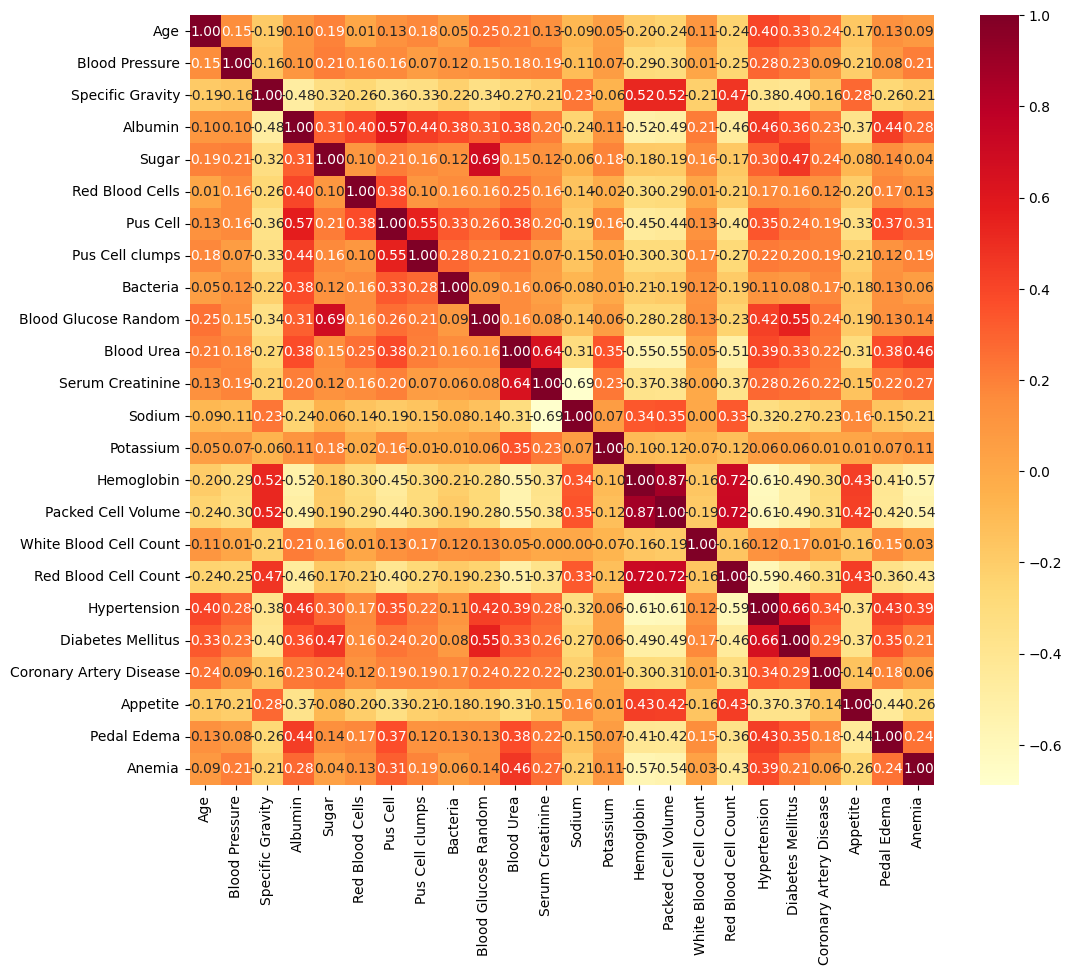

In [116]:
# 因使用logistic regression出現多重共線性問題，試評斷每個變數之間的相關性，考慮刪除過高共線性的特徵
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.show()


In [110]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# 在自變數中添加截距會造成多重共線性
scaler = StandardScaler()
scaler.fit(X)
x= scaler.transform(X)

# 初始化 Logistic Regression 模型
model = sm.Logit(y,x)    

# 適配模型
result = model.fit_regularized()

# 輸出模型摘要
result.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.11461702616165607
            Iterations: 123
            Function evaluations: 124
            Gradient evaluations: 123


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  359
Model:                          Logit   Df Residuals:                      335
Method:                           MLE   Df Model:                           23
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.8313
Time:                        10:42:43   Log-Likelihood:                -41.148
converged:                       True   LL-Null:                       -243.97
Covariance Type:            nonrobust   LLR p-value:                 1.224e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1819      0.351     -0.519      0.604      -0.869       0.505
x2             0.6852      0.348      1.968      0.049       0.003       1.368
x3            -2.2332      0.468     -4.772      0.000      -3.150      -1.316
x4             1.2680      0.416      3.045      0.002       0.452       2.084
x5             0.4349      0.511      0.851      0.395      -0.567       1.436
x6             0.2223      0.321      0.693      0.489      -0.407       0.851
x7            -0.2161      0.401     -0.539      0.590      -1.003       0.570
x8             0.1294      0.374      0.346      0.729      -0.604       0.863
x9            -0.2316      0.308     -0.753      0.451      -0.834       0.371
x10            0.9116      0.568      1.606      0.108      -0.201       2.024
x11           -1.8843      0.662     -2.848      0.004      -3.181      -0.588
x12            1.7562      0.970      1.810      0.070      -0.145       3.657
x13            0.2439      0.956      0.255      0.799      -1.630       2.118
x14            0.0059      0.536      0.011      0.991      -1.046       1.057
x15           -5.4360      1.599     -3.400      0.001      -8.570      -2.302
x16            1.4285      1.169      1.221      0.222      -0.864       3.721
x17            0.2267      0.402      0.564      0.573      -0.561       1.015
x18           -1.0852      0.749     -1.448      0.148      -2.554       0.384
x19            0.7326      0.433      1.693      0.091      -0.116       1.581
x20            0.6914      0.424      1.632      0.103      -0.139       1.522
x21           -0.8070      0.369     -2.184      0.029      -1.531      -0.083
x22           -0.6146      0.392     -1.567      0.117      -1.383       0.154
x23            0.4400      0.392      1.122      0.262      -0.328       1.208
x24           -0.5731      0.404     -1.417      0.156      -1.366       0.220
==============================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
variable_names = list(X.columns)
print(variable_names)

['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia']


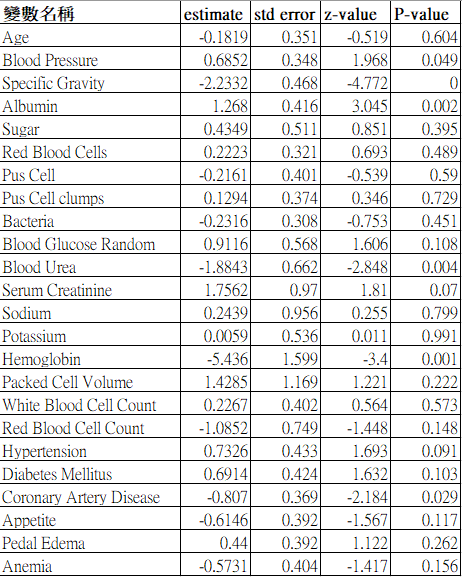

In [40]:
from IPython.display import Image
Image(filename="螢幕擷取畫面 2023-10-27 095142.png",width=400,height=400)

血紅蛋白（Hemoglobin）的上升對於慢性腎臟疾病發生的可能性具有負相關，且具有統計上的顯著性，其原因可能是當腎臟功能受損後，由於腎臟是血紅素的分泌地，當腎臟功能受損時，紅血球生成可能受到抑制，從而導致血紅蛋白水平下降。

(c)
specific gravity、Albumin、Blood Urea、Hemoglobin在統計上是顯著的。

(d)

In [113]:
# 使用20%作為模型測試資料集作為評斷模型準確率之標準
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89        30
         1.0       0.93      0.90      0.92        42

    accuracy                           0.90        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.90      0.90      0.90        72



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


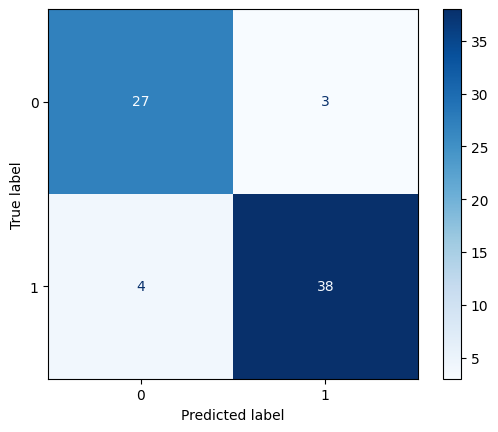

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score


# Initialize and fit a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Make predictions on x_test
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
cm_display.plot(cmap='Blues', values_format='d')

# To show the plot
plt.show()


使用Logistic  Regression判斷慢性疾病發生率其準確率高達九成，準確率高。

(e)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        30
         1.0       1.00      0.90      0.95        42

    accuracy                           0.94        72
   macro avg       0.94      0.95      0.94        72
weighted avg       0.95      0.94      0.94        72



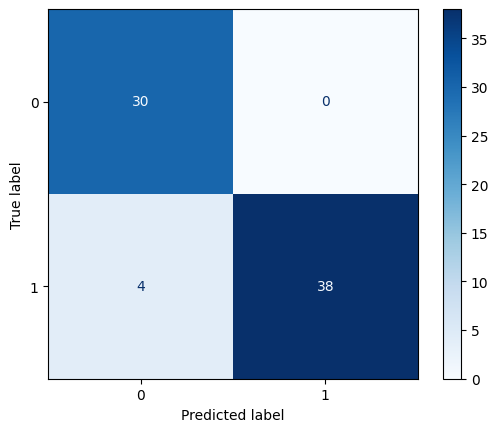

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 假設 X 是您的特徵資料，y 是您的目標變數


lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


y_pred = lda.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
cm_display.plot(cmap='Blues', values_format='d')

# To show the plot
plt.show()


使用線性判別分析預測慢性疾病效果較logistic效果更加，準確率達到94%，其可能原因是特徵於特定類別的分布近似於常態分配

(f)

Accuracy: 0.41
Classification Report:
               precision    recall  f1-score   support

         0.0       0.41      1.00      0.58        44
         1.0       0.00      0.00      0.00        64

    accuracy                           0.41       108
   macro avg       0.20      0.50      0.29       108
weighted avg       0.17      0.41      0.24       108



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:915: RuntimeWarning: divide by zero encountered i

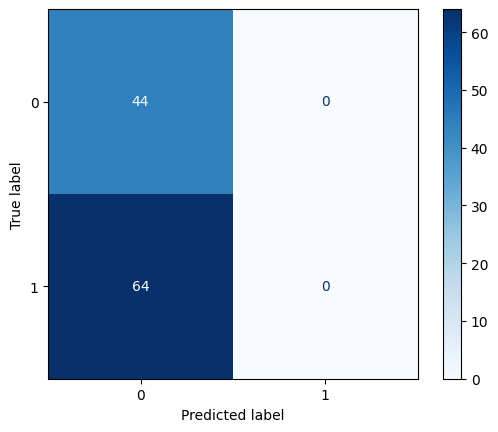

In [41]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model on the training data
qda.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = qda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
cm_display.plot(cmap='Blues', values_format='d')

# To show the plot
plt.show()


使用二次判別分析效果非常差，完全無法分辨出罹患慢性疾病者，可能原因是  
1.共變異數矩陣的估計不穩定(在使用LOGISTIC回歸時發現矩陣種有很強的共線性)，且二次判別分析會將共變異矩陣納入估計。  
2.資料過於簡單，不需要使用複雜的非線性模型來區分不同類別。  
3.樣本數太少。